In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

In [2]:
df.index.size

4622

In [3]:
df.columns.size

5

In [4]:
df['item_name'].describe().top

'Chicken Bowl'

In [5]:
df['item_name'].describe().freq

726

In [6]:
df['item_name'].unique().size

50

In [7]:
df['item_name'].size

4622

In [8]:
df['item_price'] = df['item_price'].apply(lambda x: x.replace("$", ""))
df['item_price'] = df['item_price'].astype(float)

In [9]:
df.loc[:, ['item_name', 'item_price']]

item_name  item_price
0              Chips and Fresh Tomato Salsa        2.39
1                                      Izze        3.39
2                          Nantucket Nectar        3.39
3     Chips and Tomatillo-Green Chili Salsa        2.39
4                              Chicken Bowl       16.98
5                              Chicken Bowl       10.98
6                             Side of Chips        1.69
7                             Steak Burrito       11.75
8                          Steak Soft Tacos        9.25
9                             Steak Burrito        9.25
10                      Chips and Guacamole        4.45
11                     Chicken Crispy Tacos        8.75
12                       Chicken Soft Tacos        8.75
13                             Chicken Bowl       11.25
14                      Chips and Guacamole        4.45
15    Chips and Tomatillo-Green Chili Salsa        2.39
16                          Chicken Burrito        8.49
17                          Chicken Burrito        8.49
18                              Canned Soda        2.18
19                             Chicken Bowl        8.75
20                      Chips and Guacamole        4.45
21                         Barbacoa Burrito        8.99
22                         Nantucket Nectar        3.39
23                          Chicken Burrito       10.98
24                                     Izze        3.39
25             Chips and Fresh Tomato Salsa        2.39
26                             Chicken Bowl        8.49
27                         Carnitas Burrito        8.99
28                              Canned Soda        1.09
29                          Chicken Burrito        8.49
...                                     ...         ...
4592                       Barbacoa Burrito       11.75
4593                          Carnitas Bowl       11.75
4594                          Barbacoa Bowl       11.75
4595                           Chicken Bowl        8.75
4596                    Chips and Guacamole        4.45
4597                      Canned Soft Drink        1.25
4598                          Bottled Water        1.50
4599                           Chicken Bowl        8.75
4600                    Chips and Guacamole        4.45
4601                      Canned Soft Drink        1.25
4602                       Barbacoa Burrito        9.25
4603                       Barbacoa Burrito        9.25
4604                           Chicken Bowl        8.75
4605                    Chips and Guacamole        4.45
4606                      Canned Soft Drink        1.25
4607                          Steak Burrito       11.75
4608                         Veggie Burrito       11.25
4609                      Canned Soft Drink        1.25
4610                          Steak Burrito       11.75
4611                         Veggie Burrito       11.25
4612                          Carnitas Bowl        9.25
4613                                  Chips        2.15
4614                          Bottled Water        1.50
4615                     Chicken Soft Tacos        8.75
4616                    Chips and Guacamole        4.45
4617                          Steak Burrito       11.75
4618                          Steak Burrito       11.75
4619                     Chicken Salad Bowl       11.25
4620                     Chicken Salad Bowl        8.75
4621                     Chicken Salad Bowl        8.75

[4622 rows x 2 columns]

In [10]:
df['item_price'].sum()

34500.16

In [11]:
df['order_id'].unique().size

1834

In [12]:
df.groupby('order_id').sum().mean()['item_price']

18.81142857142869

In [13]:
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1834),
                   "order_id": np.arange(1, 1835)})

In [14]:
pd.merge(df, dfa, on = 'order_id')

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
5            3         1                           Chicken Bowl   
6            3         1                          Side of Chips   
7            4         1                          Steak Burrito   
8            4         1                       Steak Soft Tacos   
9            5         1                          Steak Burrito   
10           5         1                    Chips and Guacamole   
11           6         1                   Chicken Crispy Tacos   
12           6         1                     Chicken Soft Tacos   
13           7         1                           Chicken Bowl   
14           7         1                    Chips and Guacamole   
15           8         1  Chips and Tomatillo-Green Chili Salsa   
16           8         1                        Chicken Burrito   
17           9         1                        Chicken Burrito   
18           9         2                            Canned Soda   
19          10         1                           Chicken Bowl   
20          10         1                    Chips and Guacamole   
21          11         1                       Barbacoa Burrito   
22          11         1                       Nantucket Nectar   
23          12         1                        Chicken Burrito   
24          12         1                                   Izze   
25          13         1           Chips and Fresh Tomato Salsa   
26          13         1                           Chicken Bowl   
27          14         1                       Carnitas Burrito   
28          14         1                            Canned Soda   
29          15         1                        Chicken Burrito   
...        ...       ...                                    ...   
4592      1825         1                       Barbacoa Burrito   
4593      1825         1                          Carnitas Bowl   
4594      1825         1                          Barbacoa Bowl   
4595      1826         1                           Chicken Bowl   
4596      1826         1                    Chips and Guacamole   
4597      1826         1                      Canned Soft Drink   
4598      1826         1                          Bottled Water   
4599      1827         1                           Chicken Bowl   
4600      1827         1                    Chips and Guacamole   
4601      1827         1                      Canned Soft Drink   
4602      1827         1                       Barbacoa Burrito   
4603      1827         1                       Barbacoa Burrito   
4604      1828         1                           Chicken Bowl   
4605      1828         1                    Chips and Guacamole   
4606      1828         1                      Canned Soft Drink   
4607      1829         1                          Steak Burrito   
4608      1829         1                         Veggie Burrito   
4609      1829         1                      Canned Soft Drink   
4610      1830         1                          Steak Burrito   
4611      1830         1                         Veggie Burrito   
4612      1831         1                          Carnitas Bowl   
4613      1831         1                                  Chips   
4614      1831         1                          Bottled Water   
4615      1832         1                     Chicken Soft Tacos   
4616      1832         1                    Chips and Guacamole   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken 

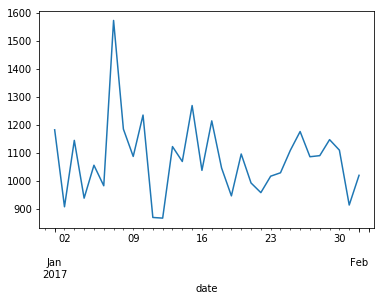

In [15]:
pd.merge(df, dfa, on = 'order_id').groupby('date').sum()['item_price'].plot()

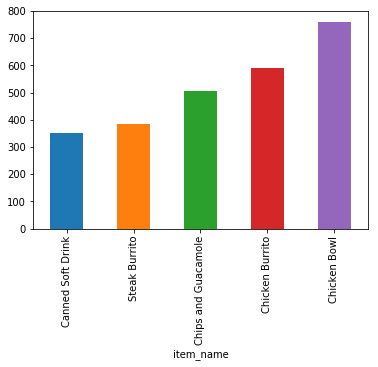

In [16]:
df.groupby('item_name').sum().sort_values(by = 'quantity').tail(5)['quantity'].plot(kind = 'bar')

In [17]:
df.sort_values(by = 'item_name')

order_id  quantity          item_name  \
3389      1360         2  6 Pack Soft Drink   
341        148         1  6 Pack Soft Drink   
1849       749         1  6 Pack Soft Drink   
1860       754         1  6 Pack Soft Drink   
2713      1076         1  6 Pack Soft Drink   
3422      1373         1  6 Pack Soft Drink   
553        230         1  6 Pack Soft Drink   
1916       774         1  6 Pack Soft Drink   
1922       776         1  6 Pack Soft Drink   
1937       784         1  6 Pack Soft Drink   
3836      1537         1  6 Pack Soft Drink   
298        129         1  6 Pack Soft Drink   
1976       798         1  6 Pack Soft Drink   
1167       481         1  6 Pack Soft Drink   
3875      1554         1  6 Pack Soft Drink   
1124       465         1  6 Pack Soft Drink   
3886      1558         1  6 Pack Soft Drink   
2108       849         1  6 Pack Soft Drink   
3010      1196         1  6 Pack Soft Drink   
4535      1803         1  6 Pack Soft Drink   
4169      1664         1  6 Pack Soft Drink   
4174      1666         1  6 Pack Soft Drink   
4527      1800         1  6 Pack Soft Drink   
4522      1798         1  6 Pack Soft Drink   
3806      1525         1  6 Pack Soft Drink   
2389       949         1  6 Pack Soft Drink   
3132      1248         1  6 Pack Soft Drink   
3141      1253         1  6 Pack Soft Drink   
639        264         1  6 Pack Soft Drink   
1026       422         1  6 Pack Soft Drink   
...        ...       ...                ...   
2996      1192         1       Veggie Salad   
3163      1263         1       Veggie Salad   
4084      1635         1       Veggie Salad   
1694       686         1       Veggie Salad   
2756      1094         1       Veggie Salad   
4201      1677         1  Veggie Salad Bowl   
1884       760         1  Veggie Salad Bowl   
455        195         1  Veggie Salad Bowl   
3223      1289         1  Veggie Salad Bowl   
2223       896         1  Veggie Salad Bowl   
2269       913         1  Veggie Salad Bowl   
4541      1805         1  Veggie Salad Bowl   
3293      1321         1  Veggie Salad Bowl   
186         83         1  Veggie Salad Bowl   
960        394         1  Veggie Salad Bowl   
1316       536         1  Veggie Salad Bowl   
2156       869         1  Veggie Salad Bowl   
4261      1700         1  Veggie Salad Bowl   
295        128         1  Veggie Salad Bowl   
4573      1818         1  Veggie Salad Bowl   
2683      1066         1  Veggie Salad Bowl   
496        207         1  Veggie Salad Bowl   
4109      1646         1  Veggie Salad Bowl   
738        304         1  Veggie Soft Tacos   
3889      1559         2  Veggie Soft Tacos   
2384       948         1  Veggie Soft Tacos   
781        322         1  Veggie Soft Tacos   
2851      1132         1  Veggie Soft Tacos   
1699       688         1  Veggie Soft Tacos   
1395       567         1  Veggie Soft Tacos   

                                     choice_description  item_price  
3389                                        [Diet Coke]       12.98  
341                                         [Diet Coke]        6.49  
1849                                             [Coke]        6.49  
1860                                        [Diet Coke]        6.49  
2713                                             [Coke]        6.49  
3422                                             [Coke]        6.49  
553                                         [Diet Coke]        6.49  
1916                                        [Diet Coke]        6.49  
1922                                             [Coke]        6.49  
1937                                        [Diet Coke]        6.49  
3836                                             [Coke]        6.49  
298                                            [Sprite]        6.49  
1976                                        [Diet Coke]        6.49  
1167                                             [Coke]        6.49  
3875                                     

In [18]:
df.loc[df['item_name'] == 'Veggie Salad Bowl']['item_name'].size

18

In [19]:
df.loc[(df['item_name'] == 'Canned Soda') & (df['quantity'] > 1)]['item_name'].size

20

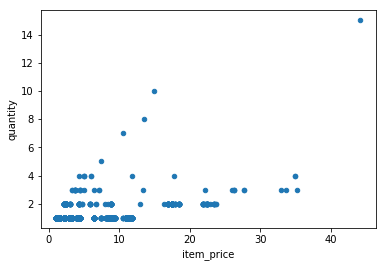

In [20]:
df.plot.scatter(x = 'item_price', y = 'quantity')